In [1]:
##import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [6]:
##load dataset
df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [7]:
## make a copy of the original dataset
df1 = df.copy()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [13]:
## Encoding of the categorical data
df1['Extracurricular Activities']=np.where(df1['Extracurricular Activities'].str.contains('No'), 0, 1)

In [21]:
df1.head()


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [38]:
df1.columns = df1.columns.str.strip()
df1.columns = df1.columns.str.replace(' ', '_')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours_Studied                     10000 non-null  int64  
 1   Previous_Scores                   10000 non-null  int64  
 2   Extracurricular_Activities        10000 non-null  int64  
 3   Sleep_Hours                       10000 non-null  int64  
 4   Sample_Question_Papers_Practiced  10000 non-null  int64  
 5   Performance_Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


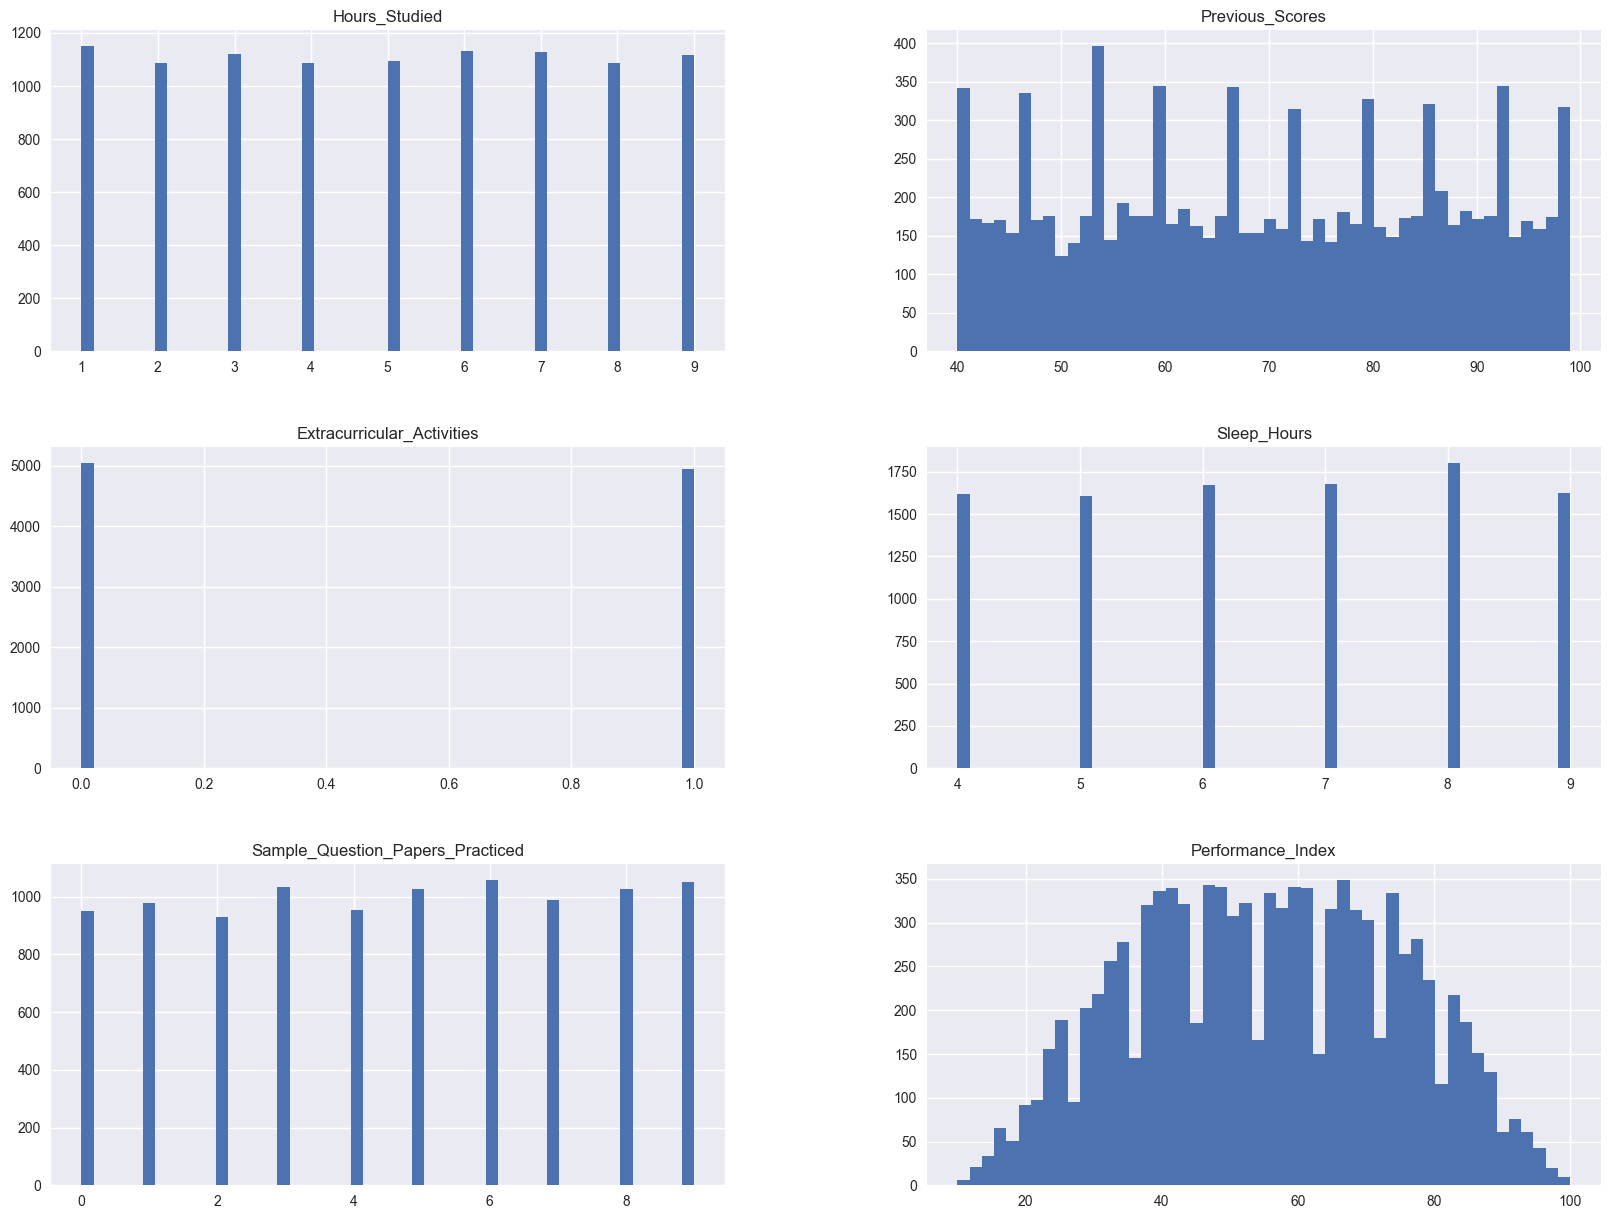

In [41]:
## plot density plot for all features
plt.style.use('seaborn-v0_8')
df1.hist(bins=50,figsize=(20,15))
plt.show()

<Axes: >

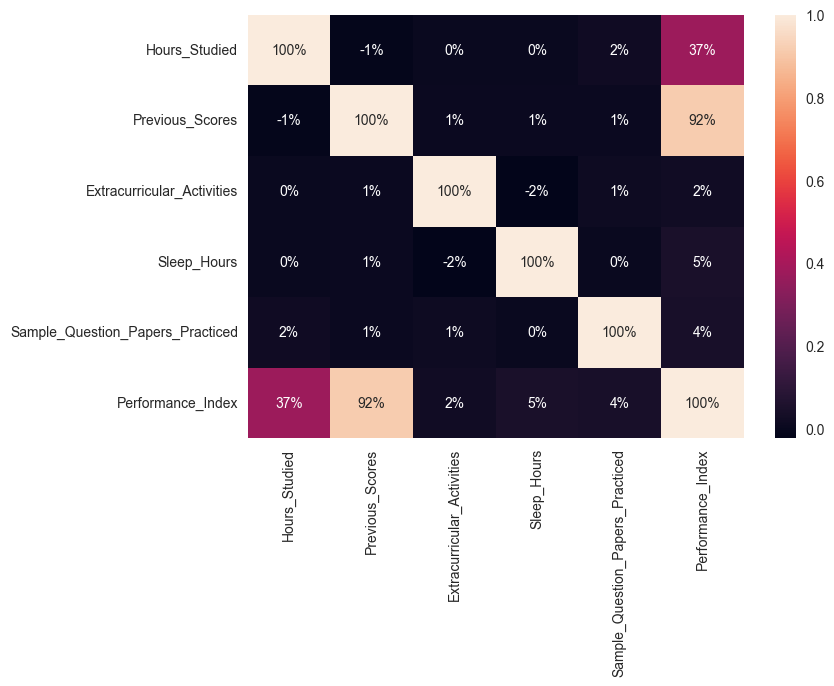

In [42]:
##checking for correlation
sns.heatmap(df1.corr(), annot=True, fmt='.0%')

## feature selection

In [53]:
## independent and dependent features
X=df1.drop('Performance_Index', axis=1)
y=df1['Performance_Index']

In [54]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7000, 5), (3000, 5), (7000,), (3000,))

<Axes: >

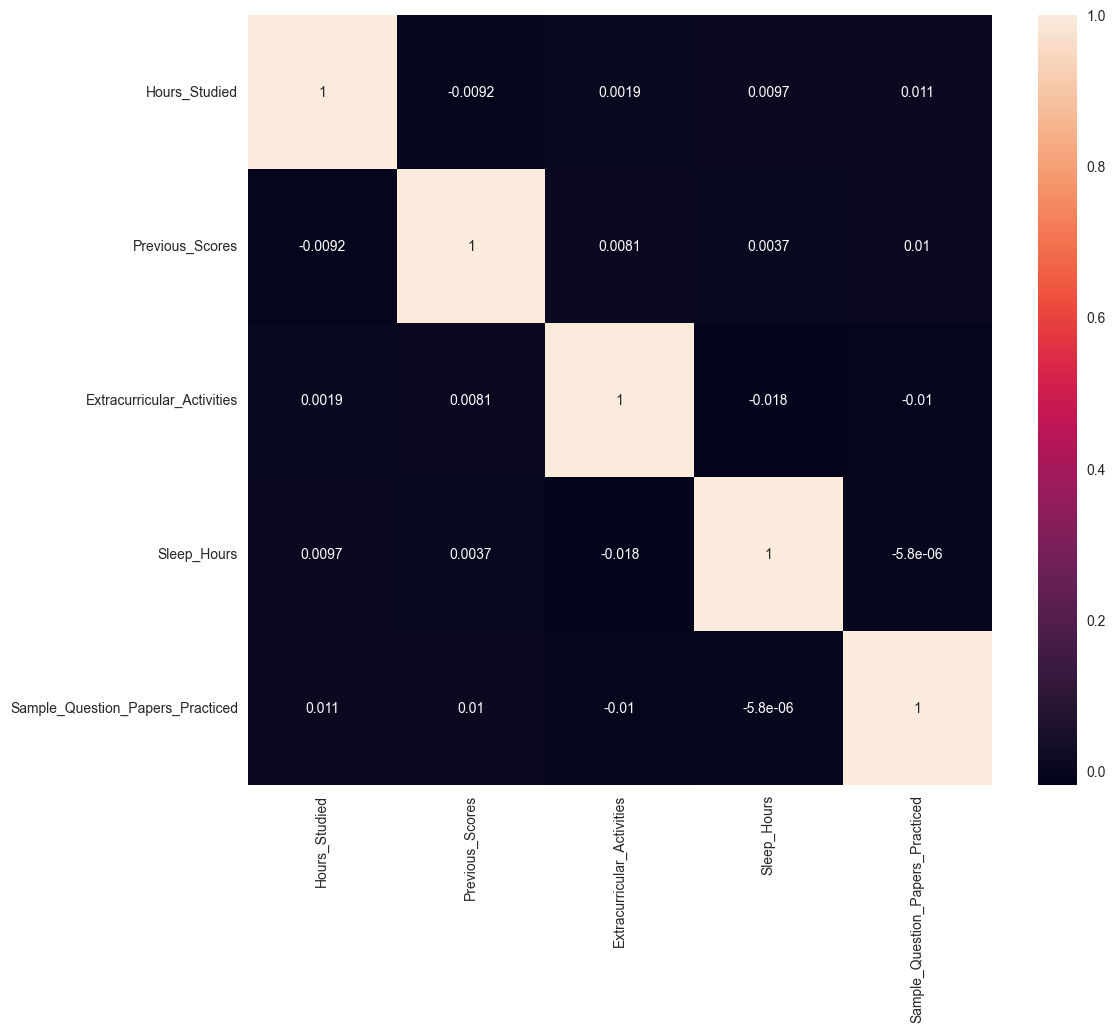

In [56]:
## Feature selection based on correlation
plt.figure(figsize=(12,10))
corr= X_train.corr()
sns.heatmap(corr, annot=True)

In [57]:
## feature scaling or standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

Text(0.5, 1.0, 'after Scaling')

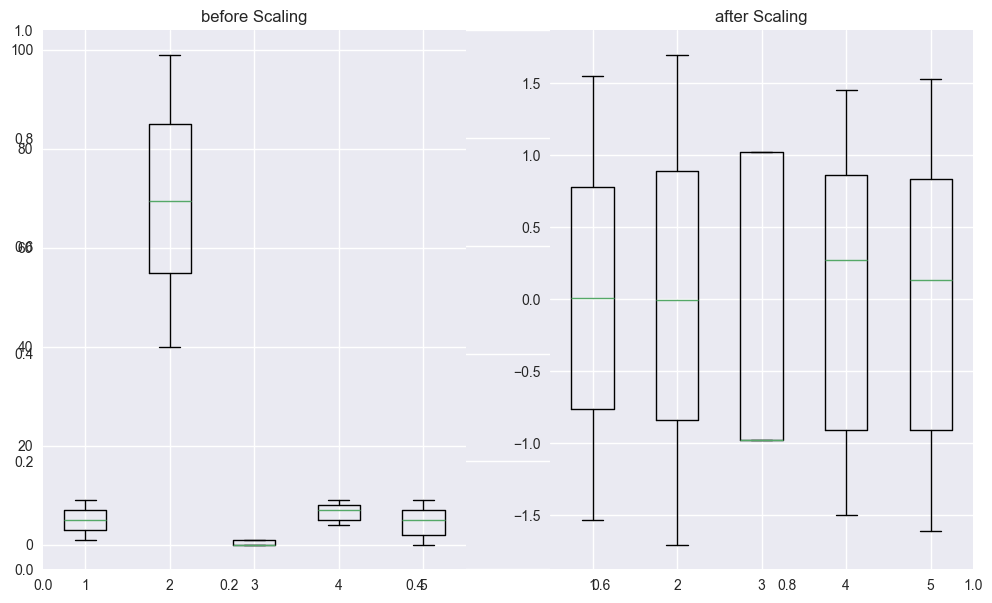

In [58]:
## box plots to understand effect of scaling
plt.subplots(figsize=(12,7))
plt.subplot(1,2,1)
plt.boxplot(X_train)
plt.title("before Scaling")
plt.subplot(1,2,2)
plt.boxplot(X_train_scaled)
plt.title("after Scaling")

## model training

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
model=LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred=model.predict(X_test_scaled)
mse=mean_squared_error(y_test, y_pred)  
r2=r2_score(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R^2 Score:', r2)
print('Mean Absolute Error:', mae)

Mean Squared Error: 4.066563824092683
R^2 Score: 0.9890110607021136
Mean Absolute Error: 1.6090437564045224


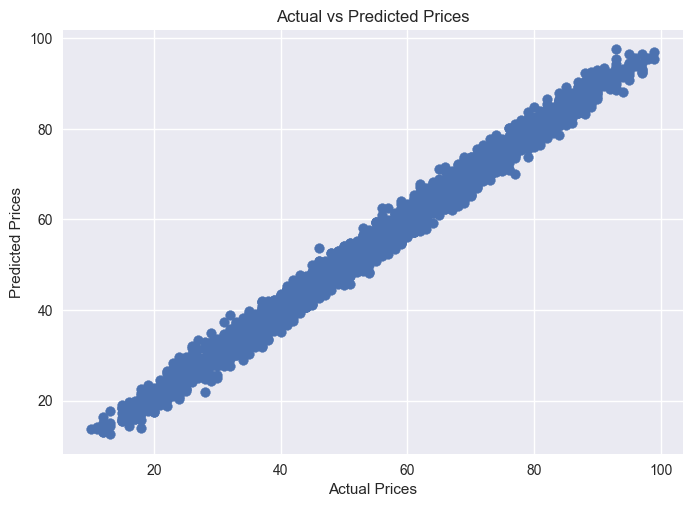

In [60]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

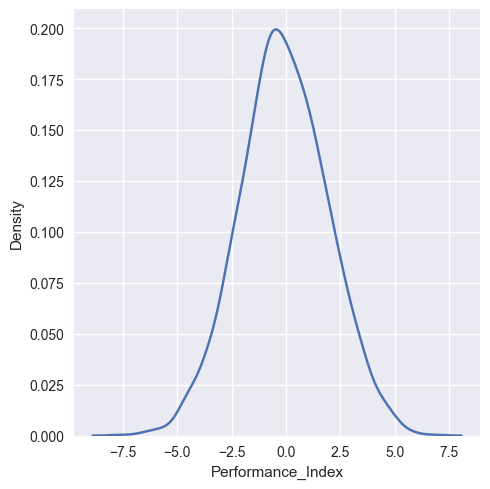

In [61]:
residuals= y_test - y_pred
sns.displot(residuals, kind='kde')

In [62]:
from sklearn.linear_model import LassoCV
lasso_cv_model = LassoCV(cv=5)
lasso_cv_model.fit(X_train_scaled, y_train)
y_pred=lasso_cv_model.predict(X_test_scaled)
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)

print('Lasso CV Regression:')
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)
print('Mean Absolute Error:', mae)

Lasso CV Regression:
Mean Squared Error: 4.075506607393217
R^2 Score: 0.988986894918151
Mean Absolute Error: 1.6102717583684398


In [63]:
## lasso regression
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print('Lasso Regression:')
print('Mean Squared Error:', mse_lasso)
print('R^2 Score:', r2_lasso)
print('Mean Absolute Error:', mae_lasso)

Lasso Regression:
Mean Squared Error: 7.407412521643181
R^2 Score: 0.9799831970981294
Mean Absolute Error: 2.14929516018328


In [64]:
## Ridge Regression
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
print('Ridge Regression:')
print('Mean Squared Error:', mse_ridge)
print('R^2 Score:', r2_ridge)
print('Mean Absolute Error:', mae_ridge)

Ridge Regression:
Mean Squared Error: 4.067324789051462
R^2 Score: 0.989009004371978
Mean Absolute Error: 1.6091746192078553


In [65]:
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(model, open('model.pkl', 'wb'))
